# ESCOLA POLITÉCNICA DA UNIVERSIDADE DE SÃO PAULO

## PQI 3403 Análise de Processos da Indústria Química 2021

### Case Study 3 - Regression - models

In [1]:
# Libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# Dataset split
from sklearn.model_selection import train_test_split

# Métricas
from sklearn.metrics import r2_score, mean_squared_error

### Generated dataset

In [2]:
# Creating dataset

rng = np.random.RandomState(1)
X1 = np.sort(5 * rng.rand(80, 1), axis=0)
y1 = np.sin(X1).ravel()
y1[::5] += 3 * (0.5 - rng.rand(16))


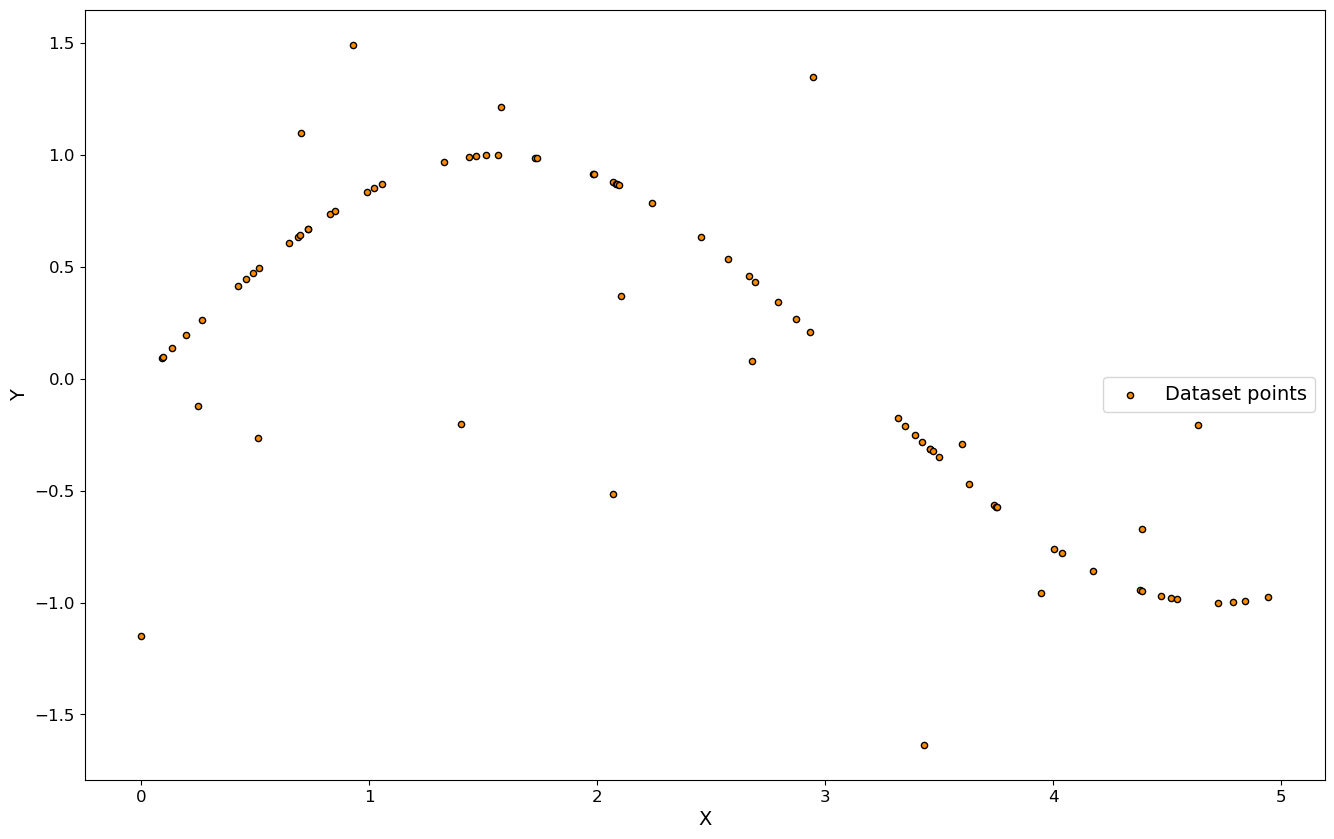

In [3]:
# Dataset plot

plt.figure(figsize = (16,10))
plt.scatter(X1, y1, s=20, edgecolor="black", c="darkorange", label="Dataset points")
plt.xlabel("X", fontsize = 14)
plt.ylabel("Y", fontsize = 14)
plt.legend(loc='center right', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [4]:
# Regression models and fit

regr_1 = LinearRegression()
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_3 = DecisionTreeRegressor(max_depth=5)
regr_4 = KNeighborsRegressor()

regr_1.fit(X1, y1)
regr_2.fit(X1, y1)
regr_3.fit(X1, y1)
regr_4.fit(X1, y1)

KNeighborsRegressor()

In [5]:
# Test dataset - Values from 0 to 5, withs step a of 0.01

X1_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

In [6]:
# Prediction

y_pred1 = regr_1.predict(X1_test)
y_pred2 = regr_2.predict(X1_test)
y_pred3 = regr_3.predict(X1_test)
y_pred4 = regr_4.predict(X1_test)

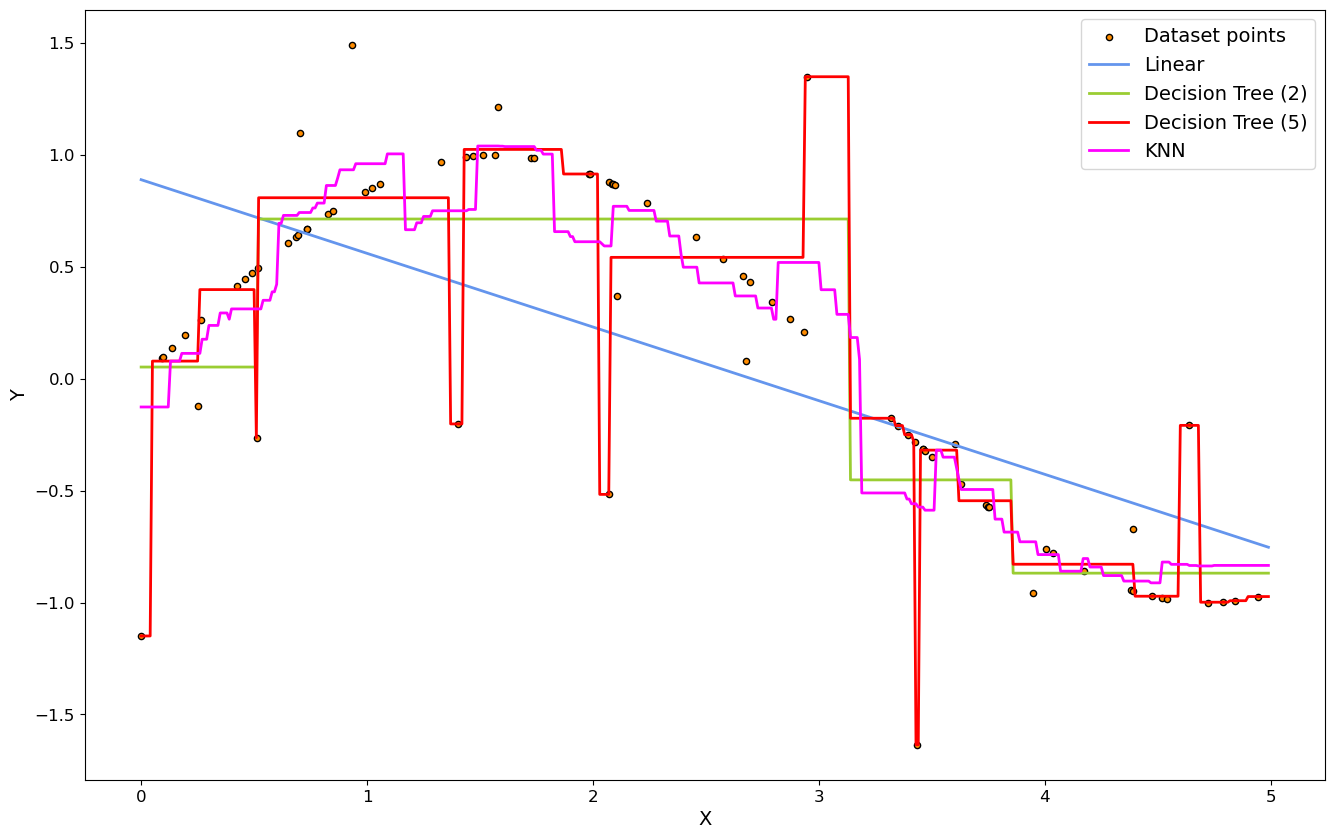

In [7]:
# Plot the results
plt.figure(figsize = (16,10))
plt.scatter(X1, y1, s=20, edgecolor="black", c="darkorange", label="Dataset points")
plt.plot(X1_test, y_pred1, color="cornflowerblue", label="Linear", linewidth=2)
plt.plot(X1_test, y_pred2, color="yellowgreen", label="Decision Tree (2)", linewidth=2)
plt.plot(X1_test, y_pred3, color="red", label="Decision Tree (5)", linewidth=2)
plt.plot(X1_test, y_pred4, color="fuchsia", label="KNN", linewidth=2)
plt.xlabel("X", fontsize = 14)
plt.ylabel("Y", fontsize = 14)
plt.legend(loc='upper right', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Public dataset

In [8]:
# Importing dataset

url = 'https://raw.githubusercontent.com/vitorlavor/education/main/regression/wholesale_customers_data.csv'
uci_customers = pd.read_csv(url, sep=',', header=0)

In [9]:
# Visualizing 10 first rows

uci_customers.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


[Text(0, 0.5, 'Channel'),
 Text(0, 1.5, 'Region'),
 Text(0, 2.5, 'Fresh'),
 Text(0, 3.5, 'Milk'),
 Text(0, 4.5, 'Grocery'),
 Text(0, 5.5, 'Frozen'),
 Text(0, 6.5, 'Detergents_Paper'),
 Text(0, 7.5, 'Delicassen')]

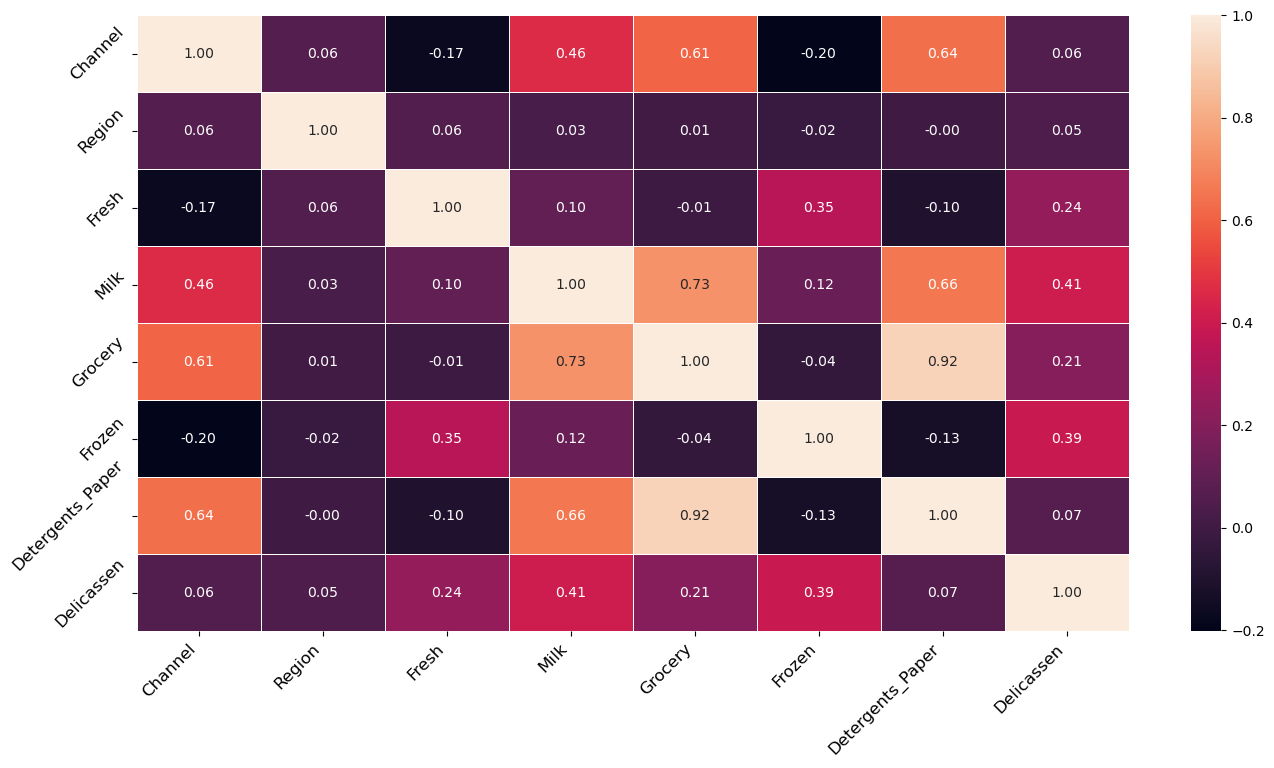

In [10]:
# Heatmap

plt.figure(figsize=(16,8))

ax = sns.heatmap(uci_customers.corr(),annot=True, linewidths=.5, fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
ax.set_yticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)

1. FRESH: Annual total spent on fresh products;
2. MILK: Annual total spent on dairy products;
3. GROCERY: Annual total spent on supermarket products;
4. FROZEN: Annual total spent on frozen products;
5. DETERGENTS_PAPER: Annual total spent on cleaning products;
6. DELICATESSEN: Annual total spent on delicatessen products;
7. CHANNEL: Type of consumer purchase channel (1- Horeca (hotel/restaurant/cafes) 2- retail)
8. REGION: Consumer region

In [11]:
# Regression attribute (X) and target (y)

X = uci_customers['Grocery'].values.reshape(-1,1)
y = uci_customers['Detergents_Paper'].values.reshape(-1,1) 

In [12]:
# Train and test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Linear regression Model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

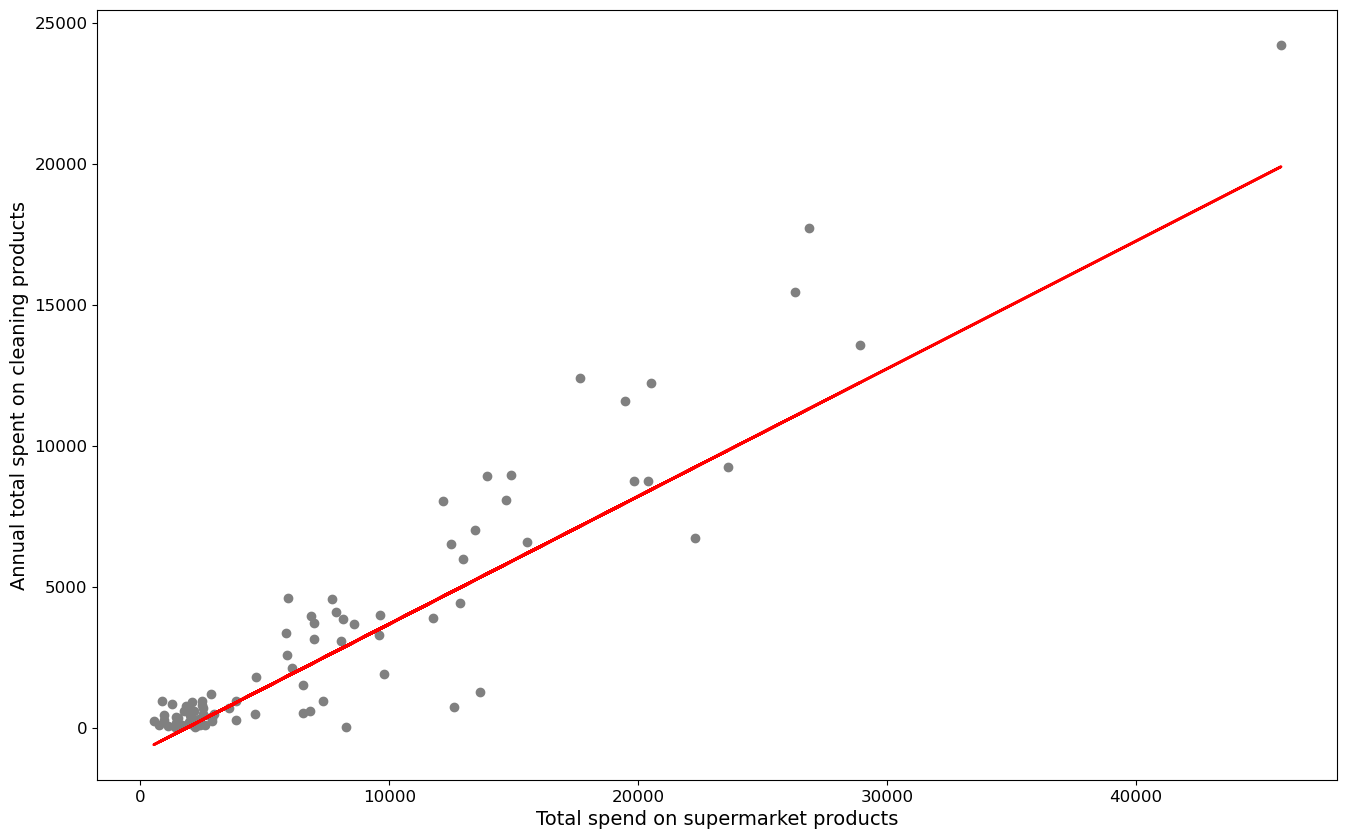

In [14]:
# Plot

plt.figure(figsize=(16,10))
y_pred = regressor.predict(X_test)
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Total spend on supermarket products', fontsize=14)
plt.ylabel('Annual total spent on cleaning products', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()